In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag
from plot_utils import plot_power_law_fit

np.random.seed(42)

In [2]:
D = 2

n_iter = 50
n_range = np.logspace(1.1, 3.1, 50).astype(int)
shape = (len(n_range), n_iter)

longest_path_iter = np.zeros(shape)

for idx, n in enumerate(tqdm(n_range)):
    for i in range(n_iter):
        DAG = dag.CausalSetGraph()
        R = dag.minkowski_interval(n, D)
        G = DAG.generate_graph(R, weighted=False)
        longest_path_iter[idx, i] = len(nx.dag_longest_path(G))
        
# Compute means and standard deviations
longest_path = np.mean(longest_path_iter, axis=1)
longest_path_std = np.std(longest_path_iter, axis=1) / np.sqrt(n_iter)

100%|██████████| 50/50 [06:48<00:00,  8.17s/it]


Fitted coefficient:  1.8647 +- 0.0042


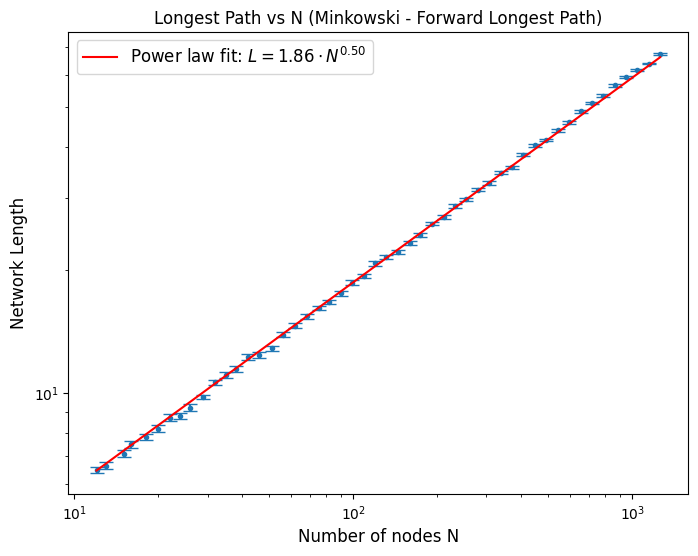

In [3]:
plot_power_law_fit(n_range, longest_path, errors=longest_path_std, power=0.5,
    title='Longest Path vs N (Minkowski - Forward Longest Path)',
    x_label="Number of nodes N",
    y_label="Network Length",
    savefig='/longest/longest_path.svg')